# Causality & Time Series

### Loading Libraries

In [9]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# IterTools
from itertools import combinations

# Statistical Models
from scipy import stats
import statsmodels.api as sm

# Networkx
import networkx as nx

# JavaScript Object Notation
import json

# Data Visualization
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.metrics import mean_absolute_percentage_error


# DoWhy Causal Libraries
import causalpy as cp
import dowhy
from dowhy import gcm
from dowhy import CausalModel
from dowhy.causal_model import CausalModel

# Notebook Iteration 
from tqdm import tqdm

# Copy
from copy import deepcopy

# Light Gradient Boosting Models
from lightgbm import LGBMRegressor, LGBMClassifier

# PyTorch & Transformers
import torch
# from catenets.models.torch import TARNet, SNet, FlexTENet
# from models.causal_bert_pytorch.CausalBert import CausalBertWrapper

## When An Econometrician Goes Bayesian

#### Data

In [10]:
# Read in the data
data = pd.read_csv('/Users/isisromero/desktop/causal_inference/data/gt_social_media_data.csv')

In [11]:
data.head()

,date,twitter,linkedin,tiktok,instagram
0,2022-05-15,55,9,23,59
1,2022-05-16,54,18,20,59
2,2022-05-17,54,20,23,57
3,2022-05-18,54,20,21,55
4,2022-05-19,49,23,21,52


In [12]:
# Datetime to index 
data.index = pd.to_datetime(data['date'])
data = data.drop('date', axis=1)

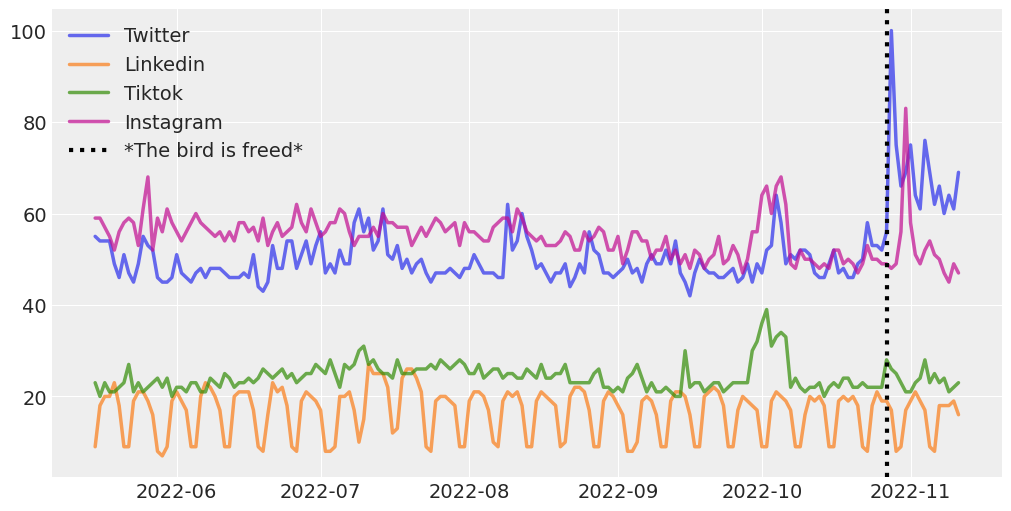

In [13]:
# Plot the data
plt.figure(figsize=(10, 5))

for i, series in enumerate(data.columns):
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)
    
plt.axvline(pd.to_datetime('2022-10-27'), color='black', lw=3, ls='dotted', label='*The bird is freed*')
plt.legend()
plt.show()

In [14]:
# Get the treatment time index
treatment_index = pd.to_datetime('2022-10-28')

### Modeling

In [18]:
# Build the model
model = cp.pymc_models.WeightedSumFitter()

# Define the model
formula = 'twitter ~ 0 + tiktok + linkedin + instagram'

# Run the experiment
results = cp.SyntheticControl(
    data,
    treatment_index,
    formula=formula,
    model=model,
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


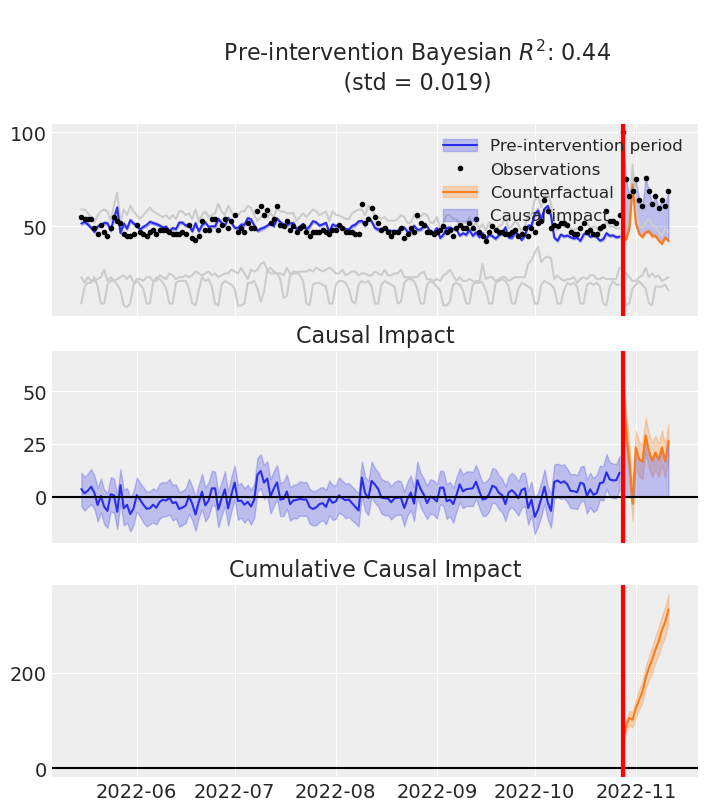

In [19]:
# Plot results
results.plot(plot_predictors=True)
plt.show()

In [20]:
# Print results summary
results.summary()

==================================Pre-Post Fit==================================
Formula: twitter ~ 0 + tiktok + linkedin + instagram
Model coefficients:
    tiktok     0.056, 94% HDI [0.0035, 0.14]
    linkedin   0.11, 94% HDI [0.037, 0.15]
    instagram  0.84, 94% HDI [0.81, 0.86]
    sigma      4.3, 94% HDI [3.9, 4.8]
